In [1]:
import  os
import  tensorflow as tf
import  numpy as np
from    tensorflow import keras
from utils import LoadFishDataUtil
from    tensorflow.keras import datasets, layers, optimizers, models
from    tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
import pathlib
import h5py


In [2]:
#data_dir ='/media/xingbo/Storage/fish_identification/data/SESSION_TENT/SESSION1'
data_dir ='/media/xingbo/Storage/fish_identification/data/SESSION_AQUARIUM/SESSION1_PIGMENT'
data_dir_path = pathlib.Path(data_dir)
image_count = len(list(data_dir_path.glob('*/*.png')))
print('total images:',image_count)
BATCH_SIZE = 8
IMG_SIZE=160
IMG_WIDTH=320
IMG_HEIGHT=60

total images: 2623


In [3]:
CLASS_NAMES=None
SPLIT_WEIGHTS=(0.7, 0.3, 0.0)# train cv val vs test
myloadData = LoadFishDataUtil(data_dir,BATCH_SIZE,IMG_WIDTH,IMG_HEIGHT,CLASS_NAMES,SPLIT_WEIGHTS)
train_dataset,val_dataset,test_dataset,STEPS_PER_EPOCH, CLASS_NAMES,class_num = myloadData.loadFishData()
input_shape=(IMG_WIDTH,IMG_HEIGHT, 3)
print('total class:',class_num)


Tensor("Equal:0", shape=(298,), dtype=bool)
total class: 298


In [4]:
train_dataset_num_elements = tf.data.experimental.cardinality(train_dataset).numpy()
val_dataset_num_elements = tf.data.experimental.cardinality(val_dataset).numpy()
test_dataset_num_elements = tf.data.experimental.cardinality(test_dataset).numpy()
print(f"train_dataset_num_elements {train_dataset_num_elements}, val_dataset_num_elements {val_dataset_num_elements}, test_dataset_num_elements {test_dataset_num_elements}")


train_dataset_num_elements 1836, val_dataset_num_elements 786, test_dataset_num_elements 0


In [5]:
weight_decay = 0.000

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=input_shape,
                        kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_num))
#model.add(layers.Activation('softmax'))

In [6]:
# build model and optimizer
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 320, 60, 64)       1792      
_________________________________________________________________
activation (Activation)      (None, 320, 60, 64)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 320, 60, 64)       256       
_________________________________________________________________
dropout (Dropout)            (None, 320, 60, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 320, 60, 64)       36928     
_________________________________________________________________
activation_1 (Activation)    (None, 320, 60, 64)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 320, 60, 64)       2

In [7]:
#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='model.png')

## training 


In [8]:
epochs = 20
validation_steps = 20
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
# This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.
# train
history=model.fit(train_dataset, epochs=epochs,
                  #callbacks=[callback],
          validation_data=val_dataset, verbose=1, validation_steps=validation_steps)


Train for 1836 steps, validate for 20 steps
Epoch 1/20
1836/1836 [==============================] - 77s 42ms/step - loss: 3.2297 - accuracy: 0.3370 - val_loss: 1.2297 - val_accuracy: 0.6938
Epoch 2/20
1836/1836 [==============================] - 63s 35ms/step - loss: 0.8599 - accuracy: 0.7719 - val_loss: 0.1408 - val_accuracy: 0.9563
Epoch 3/20
1836/1836 [==============================] - 63s 35ms/step - loss: 0.5932 - accuracy: 0.8327 - val_loss: 0.1396 - val_accuracy: 0.9688
Epoch 4/20
 987/1836 [===============>..............] - ETA: 29s - loss: 0.4198 - accuracy: 0.8772

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1836/1836 [==============================] - 64s 35ms/step - loss: 0.0800 - accuracy: 0.9760 - val_loss: 5.7606e-06 - val_accuracy: 1.0000
Epoch 20/20
1836/1836 [==============================] - 64s 35ms/step - loss: 0.0653 - accuracy: 0.9810 - val_loss: 1.7583e-07 - val_accuracy: 1.0000


In [9]:
# evaluate on test set
#scores = model.evaluate(test_dataset, verbose=1)
#print("Final test loss and accuracy :", scores)

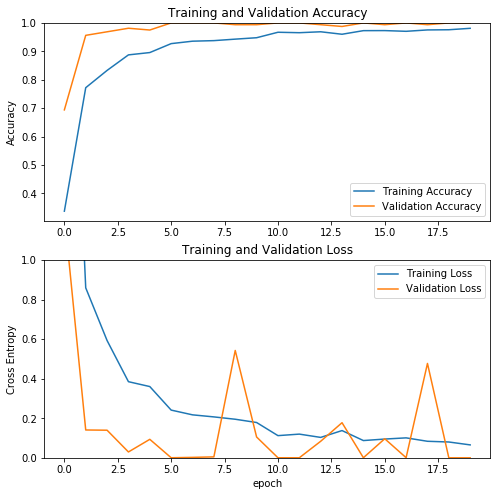

In [57]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Save model

In [11]:
# Save the model
# model.save('vggfish.h5py')

In [12]:
model.save_weights('model/vggfish20191125AQU_SEPRATE_PIGMENT.h5')

In [44]:
#model.load_weights('model/vggfish20191125AQU_SEPRATE_PIGMENT.h5')

# extract feature
## SESSION3

In [45]:
test_data_dir ='/media/xingbo/Storage/fish_identification/data/SESSION_AQUARIUM/SESSION3_PIGMENT'
BATCH_SIZE = 8
CLASS_NAMES = np.load('/media/xingbo/Storage/fish_identification/data/CLASS_NAMES.npy')
#print(CLASS_NAMES)
testloadData = LoadFishDataUtil(test_data_dir,BATCH_SIZE,IMG_WIDTH,IMG_HEIGHT,CLASS_NAMES)
sess2_test_dataset,sess2_class_num = testloadData.loadTestFishData()
test_num_elements = tf.data.experimental.cardinality(sess2_test_dataset).numpy()
print(f"we have total {test_num_elements} batches of images for testing, around {test_num_elements*BATCH_SIZE} samples")
# evaluate on test set
#scores = model.evaluate(sess2_test_dataset, verbose=1)
#print("Final test loss and accuracy :", scores)
from numpy import linalg as LA
feats = []
names = []
feature_model = models.Model(inputs=model.input, outputs=model.get_layer('batch_normalization_13').output)
n = 0
for image_batch, label_batch in sess2_test_dataset:
    feature=model(image_batch)
    
    #print(n)
    #print(feature.shape[0])
    for i in range(feature.shape[0]):
        n=n+1
        feats.append(feature[i])
        names.append(np.argwhere(label_batch[i]).ravel())
        indxmax=np.argmax(feature[i])
        #print('predictions max index:',indxmax)
        #print('predictions:', CLASS_NAMES[indxmax] )
        #print('real:', CLASS_NAMES[np.argwhere(label_batch[i]).ravel()])
       
print(f"finanly we have {n} samples extracted features")
feats3 = np.array(feats)
names3 = np.array(names)


we have total 188 images in this folder
Tensor("Equal:0", shape=(328,), dtype=bool)
we have total 24 batches of images for testing, around 192 samples
finanly we have 188 samples extracted features


In [46]:
test_data_dir ='/media/xingbo/Storage/fish_identification/data/SESSION_AQUARIUM/SESSION2_PIGMENT'
BATCH_SIZE = 8
testloadData = LoadFishDataUtil(test_data_dir,BATCH_SIZE,IMG_WIDTH,IMG_HEIGHT,CLASS_NAMES)
sess2_test_dataset,sess2_class_num = testloadData.loadTestFishData()
test_num_elements = tf.data.experimental.cardinality(sess2_test_dataset).numpy()
print(f"we have total {test_num_elements} batches of images for testing, around {test_num_elements*BATCH_SIZE} samples")

feats = []
names = []
feature_model = models.Model(inputs=model.input, outputs=model.get_layer('batch_normalization_13').output)
n = 0
for image_batch, label_batch in sess2_test_dataset:
    feature=model(image_batch)
    for i in range(feature.shape[0]):
        n=n+1
        feats.append(feature[i])
        names.append(np.argwhere(label_batch[i]).ravel())
        indxmax=np.argmax(feature[i])
       
print(f"finanly we have {n} samples extracted features")
feats2 = np.array(feats)
names2 = np.array(names)


we have total 278 images in this folder
Tensor("Equal:0", shape=(328,), dtype=bool)
we have total 35 batches of images for testing, around 280 samples
finanly we have 278 samples extracted features


In [47]:
test_data_dir ='/media/xingbo/Storage/fish_identification/data/SESSION_AQUARIUM/SESSION1_PIGMENT_LT'
BATCH_SIZE = 8
testloadData = LoadFishDataUtil(test_data_dir,BATCH_SIZE,IMG_WIDTH,IMG_HEIGHT,CLASS_NAMES)
sess2_test_dataset,sess2_class_num = testloadData.loadTestFishData()
test_num_elements = tf.data.experimental.cardinality(sess2_test_dataset).numpy()
print(f"we have total {test_num_elements} batches of images for testing, around {test_num_elements*BATCH_SIZE} samples")

feats = []
names = []
feature_model = models.Model(inputs=model.input, outputs=model.get_layer('batch_normalization_13').output)
n = 0
for image_batch, label_batch in sess2_test_dataset:
    feature=model(image_batch)
    for i in range(feature.shape[0]):
        n=n+1
        feats.append(feature[i])
        names.append(np.argwhere(label_batch[i]).ravel())
        indxmax=np.argmax(feature[i])
       
print(f"finanly we have {n} samples extracted features")
feats1 = np.array(feats)
names1 = np.array(names)





we have total 261 images in this folder
Tensor("Equal:0", shape=(328,), dtype=bool)
we have total 33 batches of images for testing, around 264 samples
finanly we have 261 samples extracted features


In [48]:
# asciiList = [n.encode("ascii", "ignore") for n in names]
# directory for storing extracted features
feats_save_path = '/media/xingbo/Storage/fish_identification/data/seperatewithpreprocess3session.h5'
print ("--------------------------------------------------")
print ("      writing feature extraction results ...")
print ("--------------------------------------------------")

h5f = h5py.File(feats_save_path, 'w')
h5f.create_dataset('Session3_features_merge3session', data=feats3)
h5f.create_dataset('Session3_names_merge3session', data=names3)

h5f.create_dataset('Session2_features_merge3session', data=feats2)
h5f.create_dataset('Session2_names_merge3session', data=names2)

h5f.create_dataset('Session1_features_merge3session', data=feats1)
h5f.create_dataset('Session1_names_merge3session', data=names1)

h5f.close()

--------------------------------------------------
      writing feature extraction results ...
--------------------------------------------------


# load features

In [49]:

feats_save_path = '/media/xingbo/Storage/fish_identification/data/seperate3session.h5'
print ("--------------------------------------------------")
print ("      reading feature extraction results ...")
print ("--------------------------------------------------")

h5f = h5py.File(feats_save_path, 'r')
Session1_features = h5f['Session1_features_merge3session'][:]
Session1_names = h5f['Session1_names_merge3session'][:]

Session2_features = h5f['Session2_features_merge3session'][:]
Session2_names = h5f['Session2_names_merge3session'][:]

Session3_features = h5f['Session3_features_merge3session'][:]
Session3_names = h5f['Session3_names_merge3session'][:]

h5f.close()
        

--------------------------------------------------
      reading feature extraction results ...
--------------------------------------------------


# matching session1 vs session 2

In [50]:
from numpy.linalg import norm
# extract query image's feature, compute simlarity score and sort
scores = np.dot(Session1_features, Session2_features.T)
print(scores.shape)
res = 1 - np.dot(Session1_features/norm(Session1_features, axis=1)[...,None],(Session2_features/norm(Session2_features,axis=1)[...,None]).T)
res = 1-res/2
lable = Session1_names == Session2_names.T
lable2 = Session1_names != Session2_names.T

gscores=res[lable]
print(gscores.shape)
iscores=res[lable2]
print(iscores.shape)

(516, 278)
(4771,)
(138677,)


In [51]:
import bob.measure
iscores1vs2 = iscores.astype('float64')
gscores1vs2=gscores.astype('float64') 

In [52]:
EER = bob.measure.eer(iscores1vs2, gscores1vs2)
print(f"we can achieve EER with {EER}")

we can achieve EER with 0.31230237354824514


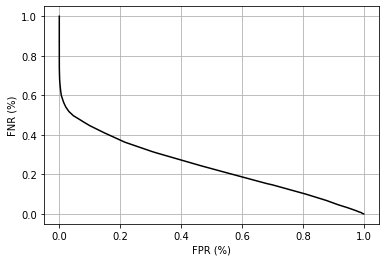

In [53]:
from matplotlib import pyplot
# we assume you have your negatives and positives already split
npoints = 100
bob.measure.plot.roc(iscores1vs2, gscores1vs2, npoints, color=(0,0,0), linestyle='-', label='test') 
pyplot.xlabel('FPR (%)') 
pyplot.ylabel('FNR (%)') 
pyplot.grid(True)
pyplot.show() 

# matching session1 vs session 3


(516, 188)
(3259,)
(93749,)
we can achieve EER with 0.44920317137162075


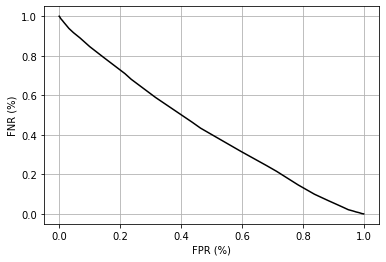

In [54]:
# extract query image's feature, compute simlarity score and sort
scores = np.dot(Session1_features, Session3_features.T)
print(scores.shape)
from numpy.linalg import norm
res = 1 - np.dot(Session1_features/norm(Session1_features, axis=1)[...,None],(Session3_features/norm(Session3_features,axis=1)[...,None]).T)
res = 1-res/2
lable = Session1_names == Session3_names.T
lable2 = Session1_names != Session3_names.T

gscores=res[lable]
print(gscores.shape)
iscores=res[lable2]
print(iscores.shape)

import bob.measure
iscores1vs3 = iscores.astype('float64')
gscores1vs3=gscores.astype('float64') 
EER = bob.measure.eer(iscores1vs3, gscores1vs3)
print(f"we can achieve EER with {EER}")
from matplotlib import pyplot
# we assume you have your negatives and positives already split
npoints = 100
bob.measure.plot.roc(iscores1vs3, gscores1vs3, npoints, color=(0,0,0), linestyle='-', label='test') 
pyplot.xlabel('FPR (%)') 
pyplot.ylabel('FNR (%)') 
pyplot.grid(True)
pyplot.show() 

# matching session2 vs session 3


(278, 188)
(1751,)
(50513,)
we can achieve EER with 0.43004384382313987


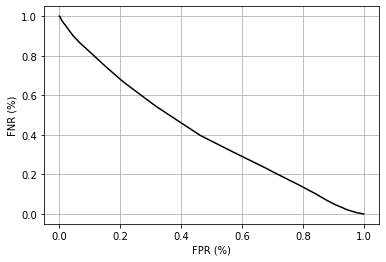

In [55]:
# extract query image's feature, compute simlarity score and sort
scores = np.dot(Session2_features, Session3_features.T)
print(scores.shape)
from numpy.linalg import norm
res = 1 - np.dot(Session2_features/norm(Session2_features, axis=1)[...,None],(Session3_features/norm(Session3_features,axis=1)[...,None]).T)
res = 1-res/2
lable = Session2_names == Session3_names.T
lable2 = Session2_names != Session3_names.T

gscores=res[lable]
print(gscores.shape)
iscores=res[lable2]
print(iscores.shape)

import bob.measure
iscores2vs3 = iscores.astype('float64')
gscores2vs3=gscores.astype('float64') 
EER = bob.measure.eer(iscores2vs3, gscores2vs3)
print(f"we can achieve EER with {EER}")
from matplotlib import pyplot
# we assume you have your negatives and positives already split
npoints = 100
bob.measure.plot.roc(iscores2vs3, gscores2vs3, npoints, color=(0,0,0), linestyle='-', label='test') 
pyplot.xlabel('FPR (%)') 
pyplot.ylabel('FNR (%)') 
pyplot.grid(True)
pyplot.show() 

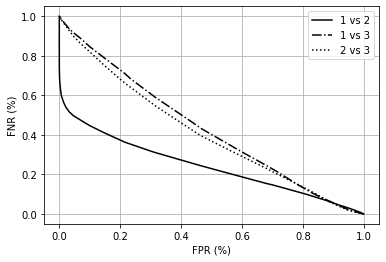

In [56]:
from matplotlib import pyplot
# we assume you have your negatives and positives already split
npoints = 100
bob.measure.plot.roc(iscores1vs2, gscores1vs2, npoints, color=(0,0,0), linestyle='-', label='1 vs 2') 
bob.measure.plot.roc(iscores1vs3, gscores1vs3, npoints, color=(0,0,0), linestyle='-.', label='1 vs 3') 
bob.measure.plot.roc(iscores2vs3, gscores2vs3, npoints, color=(0,0,0), linestyle=':', label='2 vs 3') 
pyplot.xlabel('FPR (%)') 
pyplot.ylabel('FNR (%)') 
pyplot.legend()
pyplot.grid(True)
pyplot.show() 


# intra session

we can achieve EER with 0.3060816591219866
we can achieve EER with 0.12127258674911268
we can achieve EER with 0.19334543892533584


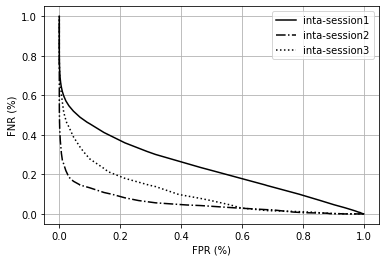

In [59]:
import bob.measure
from matplotlib import pyplot
from numpy.linalg import norm



res = 1 - np.dot(Session1_features/norm(Session1_features, axis=1)[...,None],(Session1_features/norm(Session1_features,axis=1)[...,None]).T)
res = 1-res/2
lable = Session1_names == Session1_names.T
lable2 = Session1_names != Session1_names.T

gscores=res[lable]
iscores=res[lable2]

iscores1vs1 = iscores.astype('float64')
gscores1vs1=gscores.astype('float64') 
EER1vs1 = bob.measure.eer(iscores1vs1, gscores1vs1)
print(f"we can achieve EER with {EER1vs1}")

res = 1 - np.dot(Session2_features/norm(Session2_features, axis=1)[...,None],(Session2_features/norm(Session2_features,axis=1)[...,None]).T)
res = 1-res/2
lable = Session2_names == Session2_names.T
lable2 = Session2_names != Session2_names.T

gscores=res[lable]
iscores=res[lable2]

iscores2vs2 = iscores.astype('float64')
gscores2vs2=gscores.astype('float64') 
EER2vs2 = bob.measure.eer(iscores2vs2, gscores2vs2)
print(f"we can achieve EER with {EER2vs2}")

res = 1 - np.dot(Session3_features/norm(Session3_features, axis=1)[...,None],(Session3_features/norm(Session3_features,axis=1)[...,None]).T)
res = 1-res/2
lable = Session3_names == Session3_names.T
lable2 = Session3_names != Session3_names.T

gscores=res[lable]
iscores=res[lable2]

iscores3vs3 = iscores.astype('float64')
gscores3vs3=gscores.astype('float64') 
EER3vs3 = bob.measure.eer(iscores3vs3, gscores3vs3)
print(f"we can achieve EER with {EER3vs3}")


from matplotlib import pyplot
# we assume you have your negatives and positives already split
npoints = 100
bob.measure.plot.roc(iscores1vs1, gscores1vs1, npoints, color=(0,0,0), linestyle='-', label='inta-session1') 
bob.measure.plot.roc(iscores2vs2, gscores2vs2, npoints, color=(0,0,0), linestyle='-.', label='inta-session2') 
bob.measure.plot.roc(iscores3vs3, gscores3vs3, npoints, color=(0,0,0), linestyle=':', label='inta-session3') 
pyplot.xlabel('FPR (%)') 
pyplot.ylabel('FNR (%)') 
pyplot.legend()
pyplot.grid(True)
pyplot.show() 